# Shapes and generic cells

gdsfactory provides some generic parametric cells in `gf.components` that you can customize for your application.

## Basic shapes

### Rectangle

To create a simple rectangle, there are two functions:

``gf.components.rectangle()`` can create a basic rectangle:

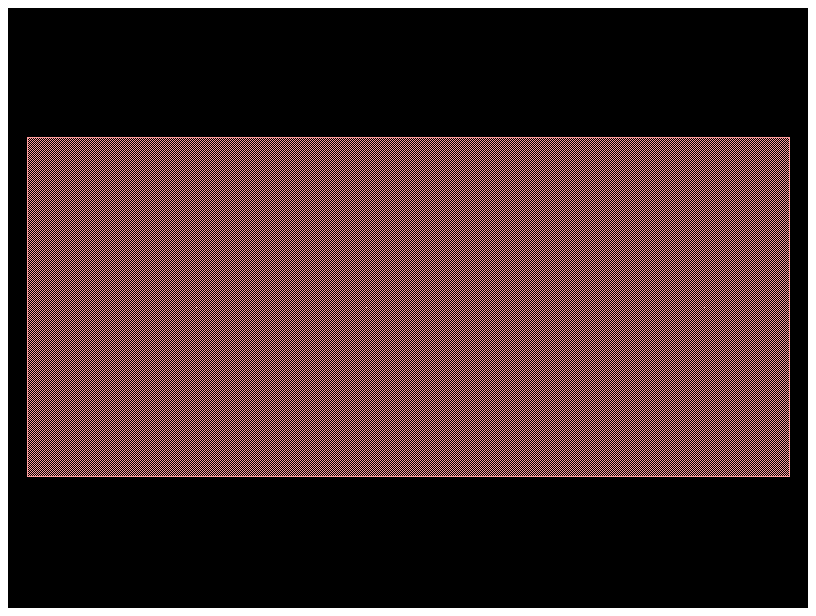

In [1]:
import gdsfactory as gf

r1 = gf.components.rectangle(size=(4.5, 2), layer=(1, 0))
r1.plot()

``gf.components.bbox()`` can also create a rectangle based on a bounding box.
This is useful if you want to create a rectangle which exactly surrounds a piece of existing geometry.
For example, if we have an arc geometry and we want to define a box around it, we can use ``gf.components.bbox()``:

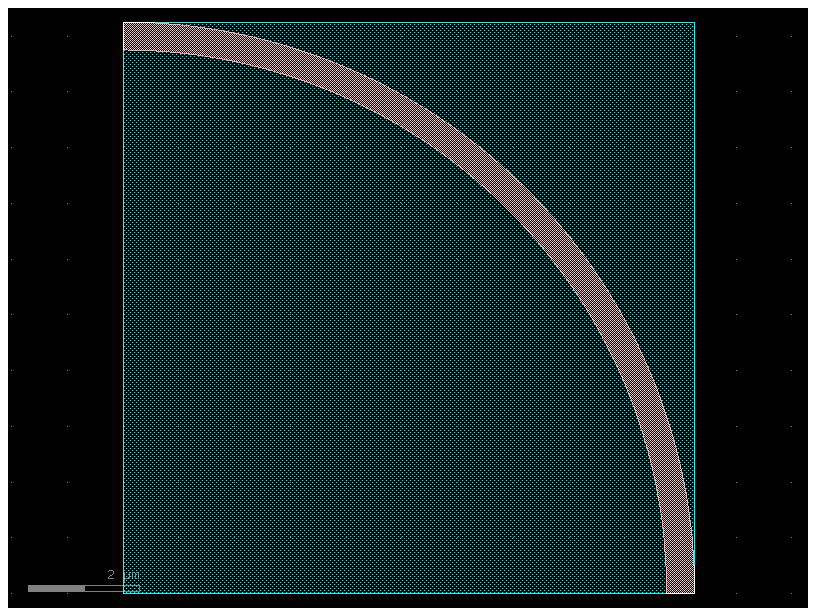

In [2]:
c = gf.Component()
arc = c << gf.components.bend_circular(radius=10, width=0.5, angle=90, layer=(1, 0))
arc.drotate(90)

# Draw a rectangle around the arc we created by using the arc's bounding box
rect = c << gf.components.bbox(arc, layer=(2, 0))
c.plot()

### Cross

The ``gf.components.cross()`` function creates a cross structure:

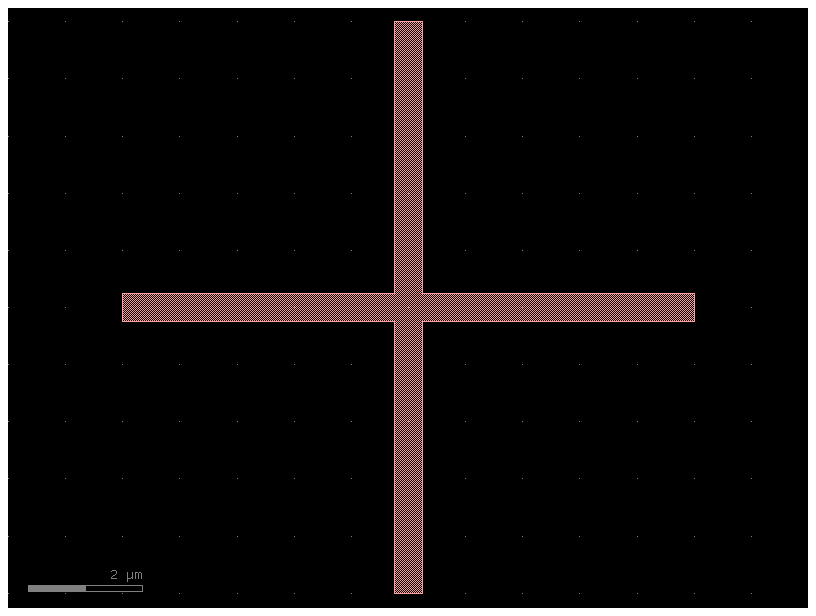

In [3]:
c = gf.components.cross(length=10, width=0.5, layer=(1, 0))
c.plot()

### Ellipse

The ``gf.components.ellipse()`` function creates an ellipse by defining the major and minor radii:

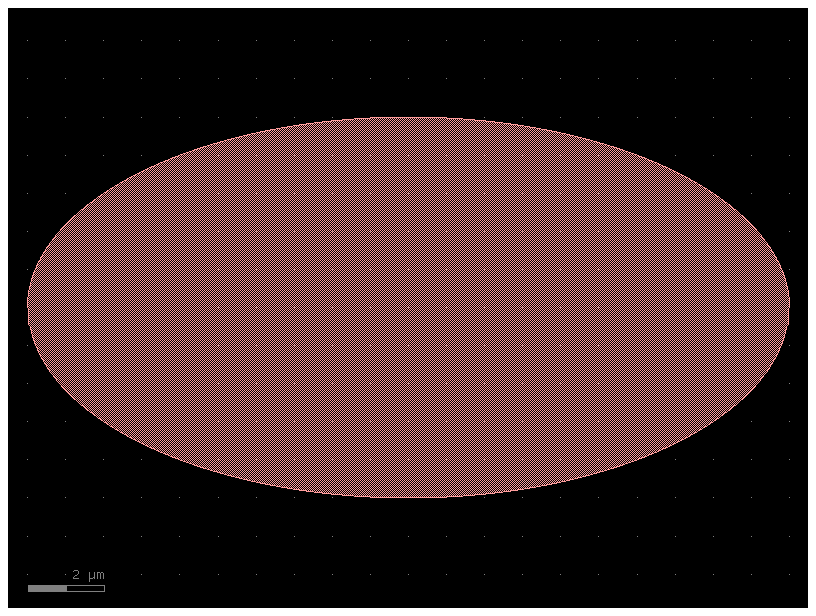

In [4]:
c = gf.components.ellipse(radii=(10, 5), angle_resolution=2.5, layer=(1, 0))
c.plot()

### Circle

The ``gf.components.circle()`` function creates a circle:

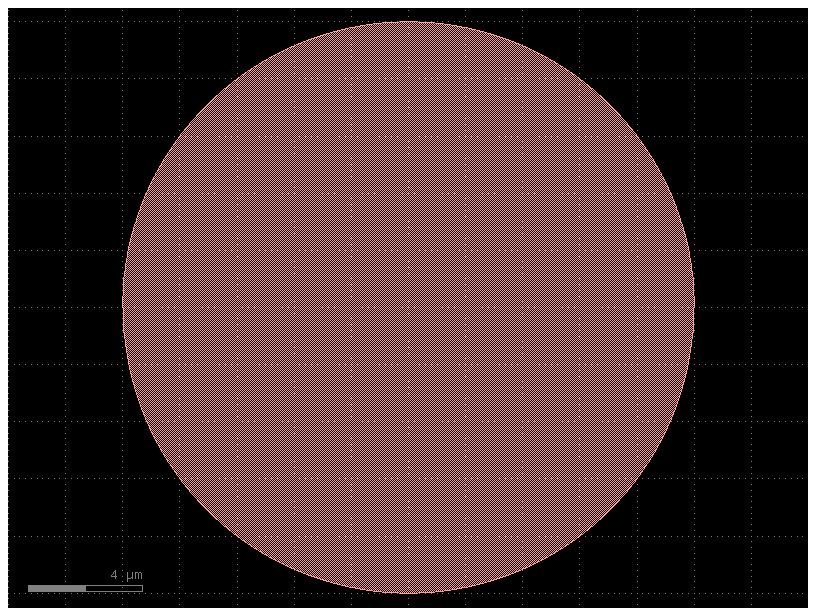

In [5]:
c = gf.components.circle(radius=10, angle_resolution=2.5, layer=(1, 0))
c.plot()

### Ring

The ``gf.components.ring()`` function creates a ring.  The radius refers to the center radius of the ring structure (halfway between the inner and outer radius).

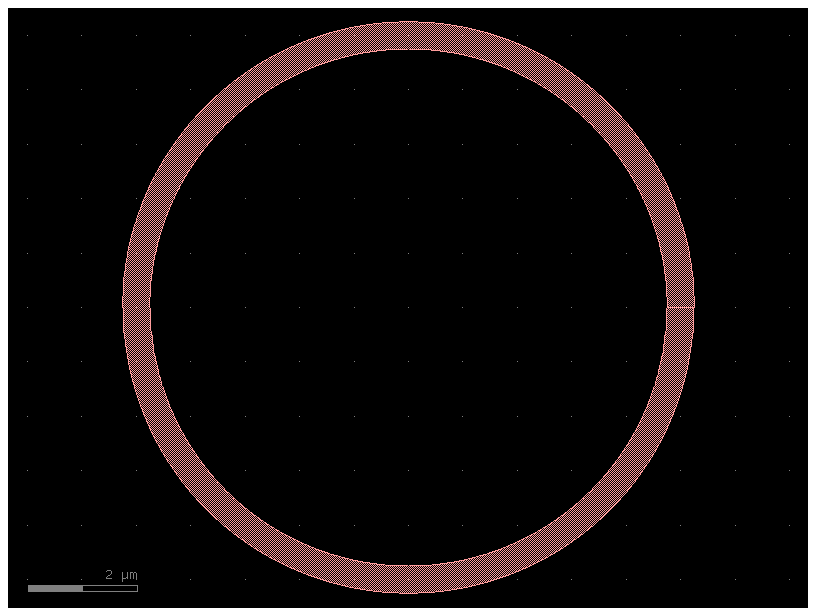

In [6]:
c = gf.components.ring(radius=5, width=0.5, angle_resolution=2.5, layer=(1, 0))
c.plot()

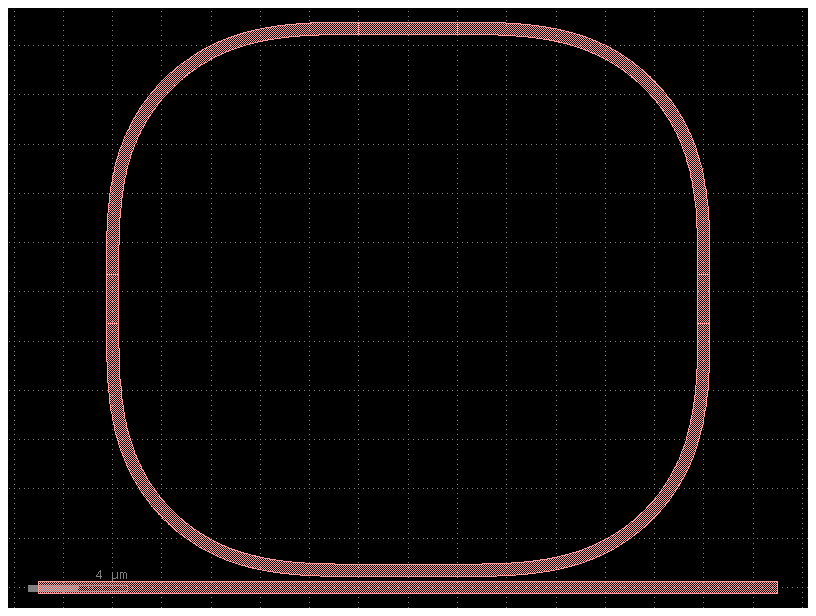

In [7]:
c = gf.components.ring_single(gap=0.2, radius=10, length_x=4, length_y=2)
c.plot()

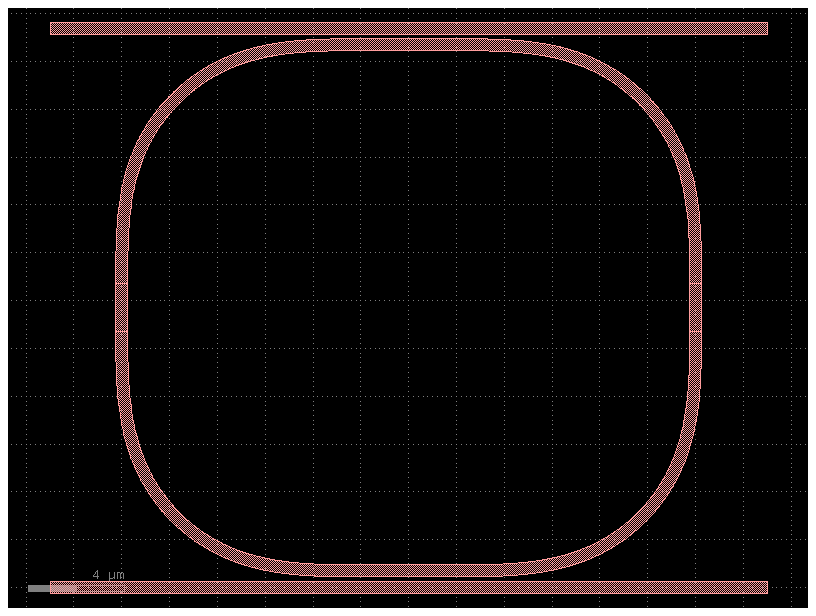

In [8]:
import gdsfactory as gf

c = gf.components.ring_double(gap=0.2, radius=10, length_x=4, length_y=2)
c.plot()

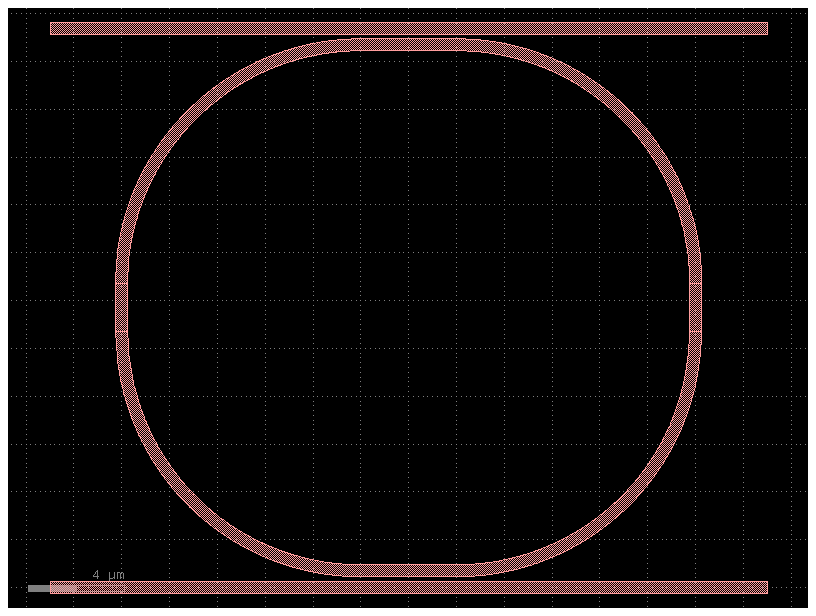

In [9]:
c = gf.components.ring_double(
    gap=0.2,
    radius=10,
    length_x=4,
    length_y=2,
    bend=gf.components.bend_circular,
)
c.plot()

### Bend circular

The ``gf.components.bend_circular()`` function creates an arc.  The radius refers to the center radius of the arc (halfway between the inner and outer radius).

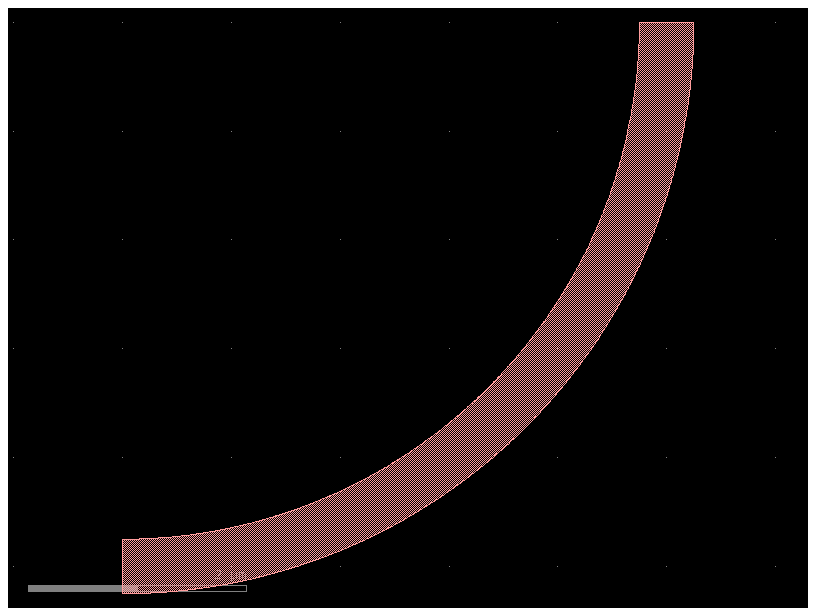

In [10]:
c = gf.components.bend_circular(
    radius=5.0, width=0.5, angle=90, npoints=720, layer=(1, 0)
)
c.plot()

### Bend euler

The ``gf.components.bend_euler()`` function creates an adiabatic bend in which the bend radius changes gradually. Euler bends have lower loss than circular bends.


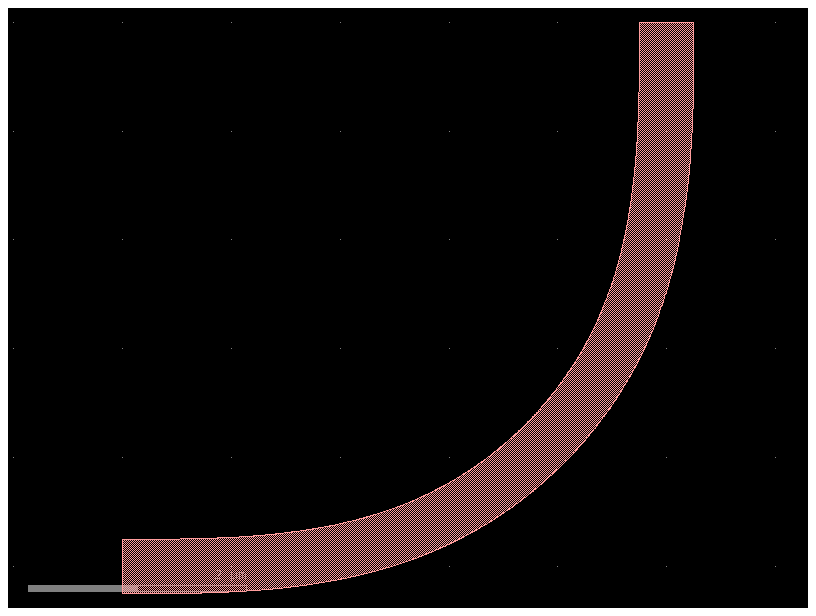

In [11]:
c = gf.components.bend_euler(radius=5.0, width=0.5, angle=90, npoints=720, layer=(1, 0))
c.plot()

### Tapers

`gf.components.taper()`is defined by setting its length and its start and end length.  It has two ports, ``1`` and ``2``, on either end, allowing you to easily connect it to other structures.

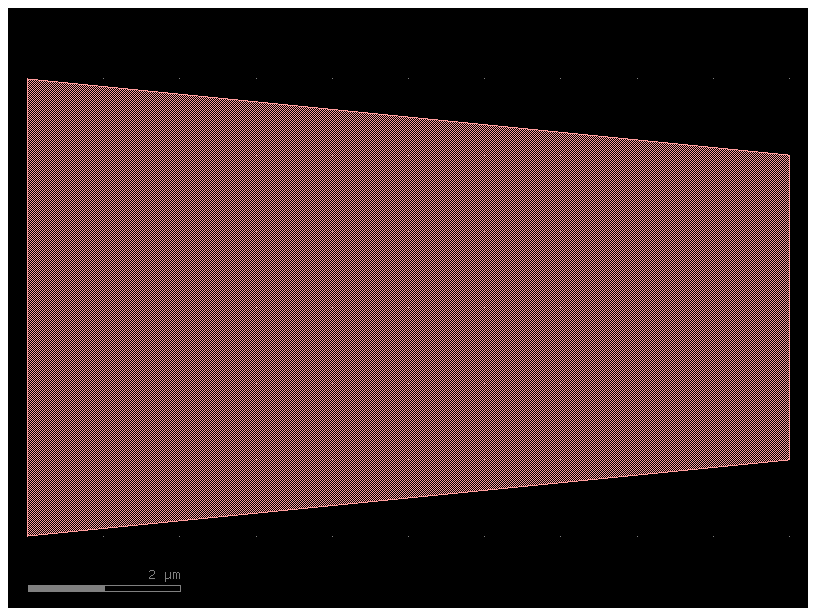

In [12]:
c = gf.components.taper(length=10, width1=6, width2=4, port=None, layer=(1, 0))
c.plot()

`gf.components.ramp()` is a structure is similar to `taper()` except it is asymmetric.  It also has two ports, ``1`` and ``2``, on either end.

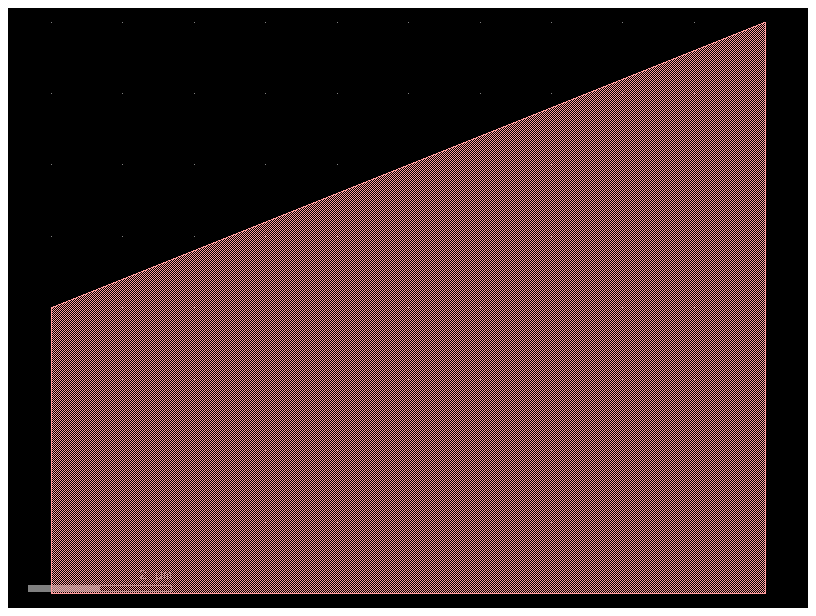

In [13]:
c = gf.components.ramp(length=10, width1=4, width2=8, layer=(1, 0))
c.plot()

### Common compound shapes

The `gf.components.L()` function creates a "L" shape with ports on either end named ``1`` and ``2``.

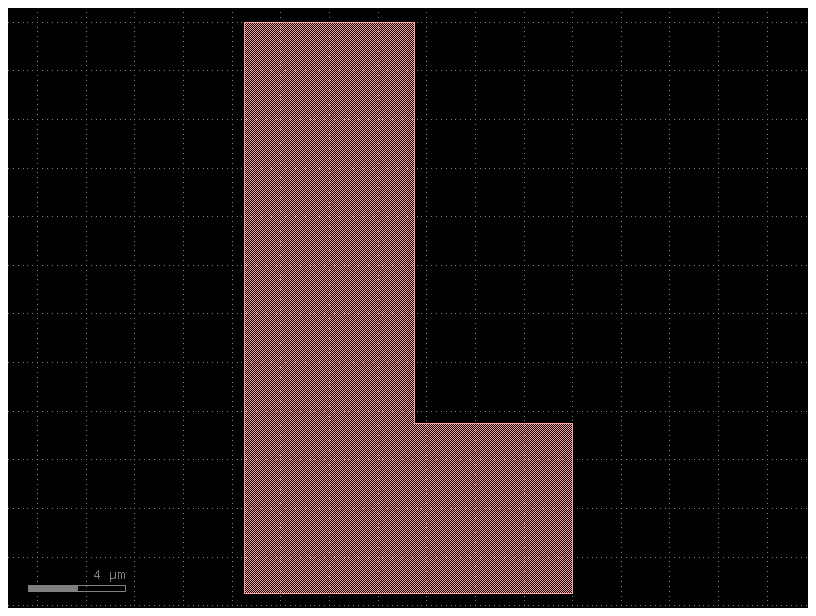

In [14]:
c = gf.components.L(width=7, size=(10, 20), layer=(1, 0))
c.plot()

The `gf.components.C()` function creates a "C" shape with ports on either end named ``1`` and ``2``.

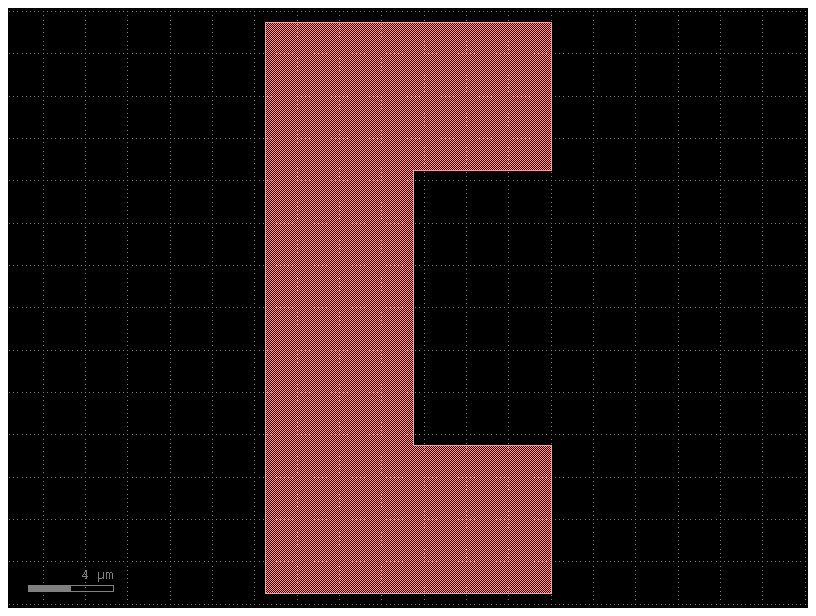

In [15]:
c = gf.components.C(width=7, size=(10, 20), layer=(1, 0))
c.plot()

## Text

Gdsfactory has an implementation of the DEPLOF font with the majority of english ASCII characters represented (thanks to phidl)

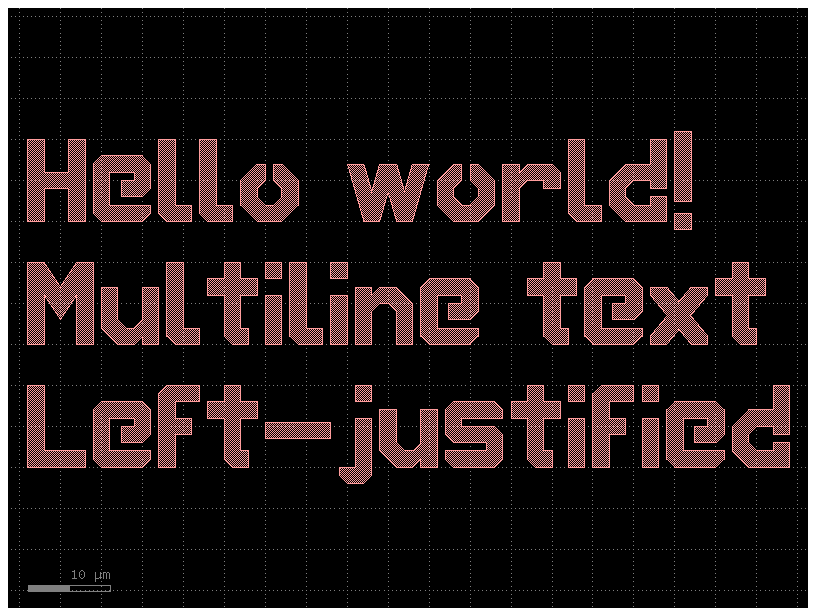

In [16]:
c = gf.components.text(
    text="Hello world!\nMultiline text\nLeft-justified",
    size=10,
    justify="left",
    layer=(1, 0),
)
c.plot()
# `justify` should be either 'left', 'center', or 'right'

## Lithography structures

### Step-resolution

The `gf.components.litho_steps()` function creates lithographic test structure that is useful for measuring resolution of photoresist or electron-beam resists.  It provides both positive-tone and negative-tone resolution tests.

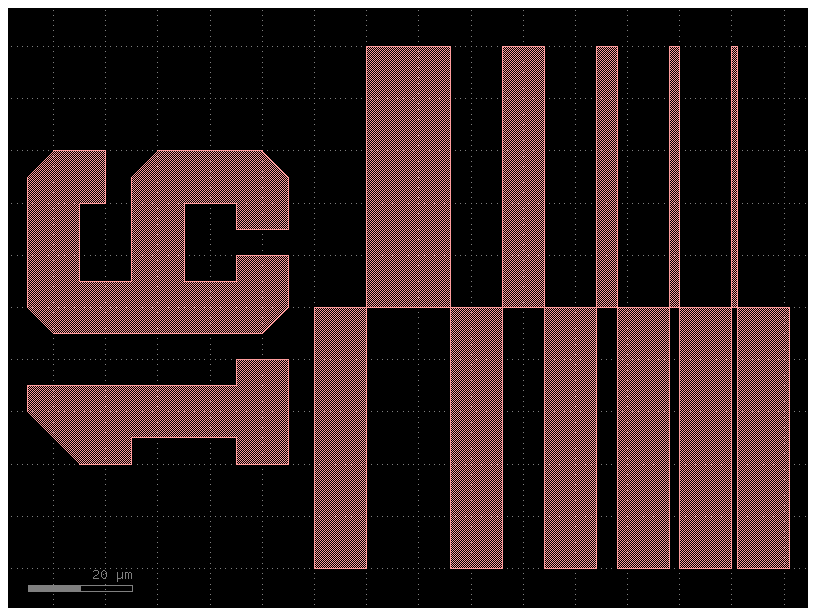

In [17]:
c = gf.components.litho_steps(
    line_widths=(1, 2, 4, 8, 16), line_spacing=10, height=100, layer=(1, 0)
)
c.plot()

### Calipers (inter-layer alignment)

The `gf.components.litho_calipers()` function is used to detect offsets in multilayer fabrication.  It creates a two sets of notches on different layers.  When an fabrication error/offset occurs, it is easy to detect how much the offset is because both center-notches are no longer aligned.

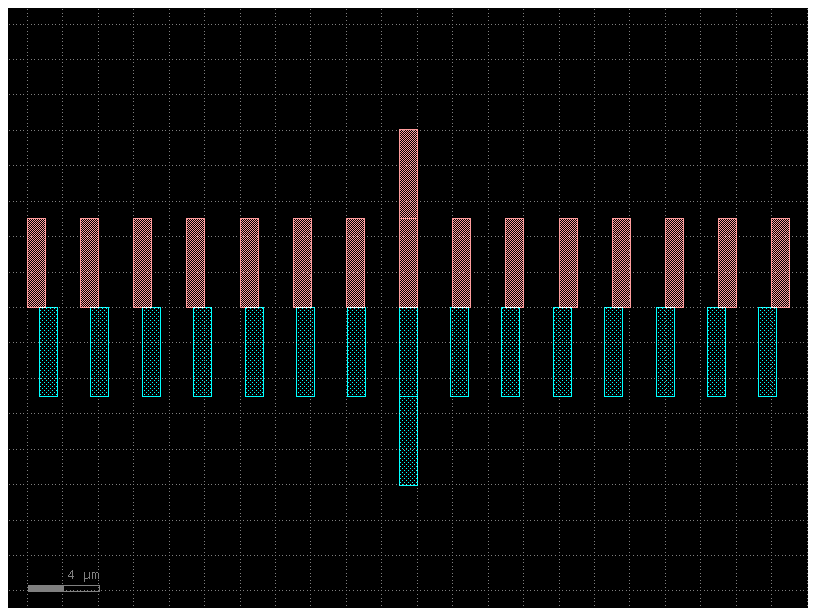

In [18]:
D = gf.components.litho_calipers(
    notch_size=(1, 5),
    notch_spacing=2,
    num_notches=7,
    offset_per_notch=0.1,
    row_spacing=0,
    layer1=(1, 0),
    layer2=(2, 0),
)
D.plot()

## Paths

See **Path tutorial** for more details -- this is just an enumeration of the available built-in Path functions

### Circular arc

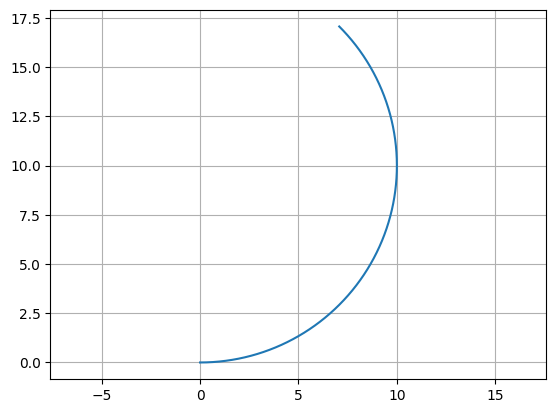

In [19]:
P = gf.path.arc(radius=10, angle=135, npoints=720)
f = P.plot()

### Straight

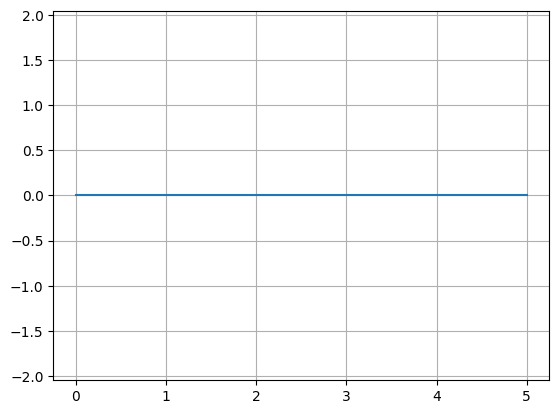

In [20]:
import gdsfactory as gf

P = gf.path.straight(length=5, npoints=100)
f = P.plot()

### Euler curve

Also known as a straight-to-bend, clothoid, racetrack, or track transition, this Path tapers adiabatically from straight to curved.  Often used to minimize losses in photonic straights.  If `p < 1.0`, will create a "partial euler" curve as described in Vogelbacher et. al. https://dx.doi.org/10.1364/oe.27.031394.  If the `use_eff` argument is false, `radius` corresponds to minimum radius of curvature of the bend.  If `use_eff`  is true, `radius` corresponds to the "effective" radius of the bend-- The curve will be scaled such that the endpoints match an arc with parameters `radius` and `angle`.

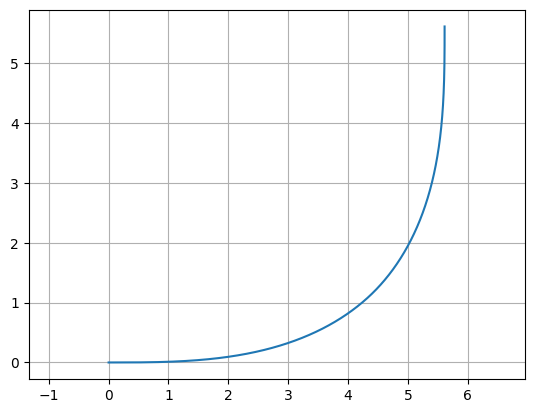

In [21]:
P = gf.path.euler(radius=3, angle=90, p=1.0, use_eff=False, npoints=720)
f = P.plot()

### Smooth path from waypoints

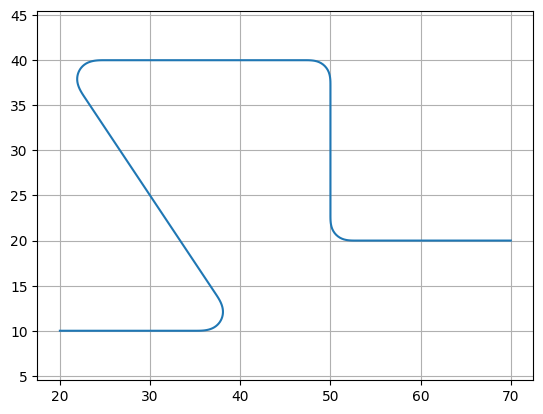

In [22]:
import numpy as np

import gdsfactory as gf

points = np.array([(20, 10), (40, 10), (20, 40), (50, 40), (50, 20), (70, 20)])

P = gf.path.smooth(
    points=points,
    radius=2,
    bend=gf.path.euler,
    use_eff=False,
)
f = P.plot()

### Delay spiral

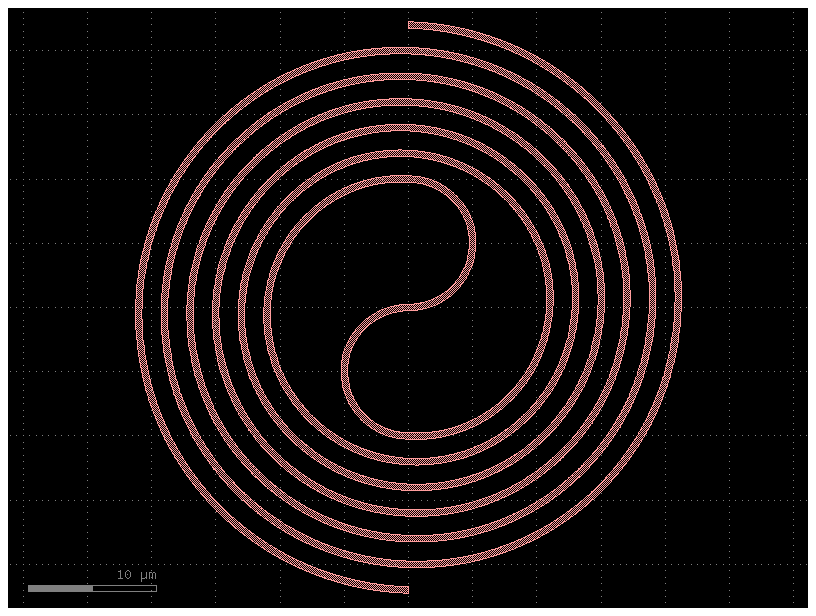

In [23]:
c = gf.components.spiral_double()
c.plot()

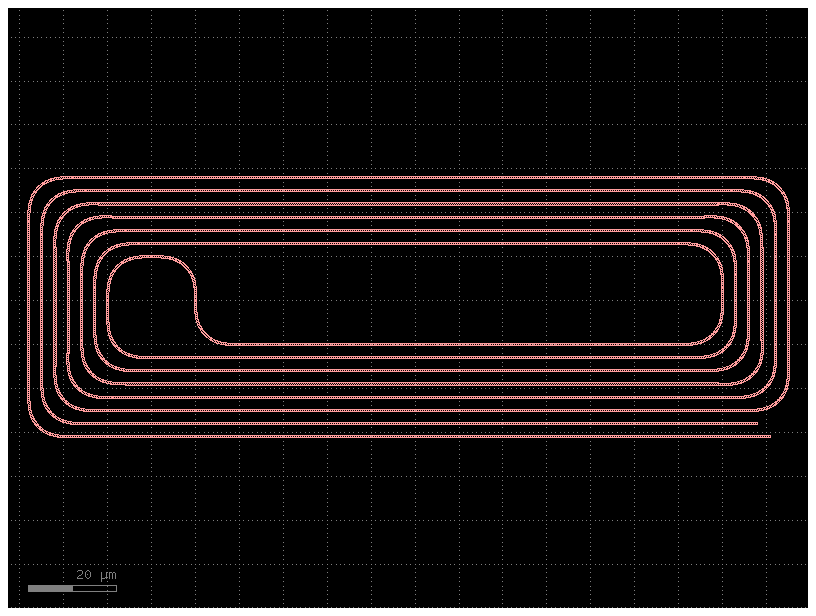

In [24]:
c = gf.components.spiral()
c.plot()

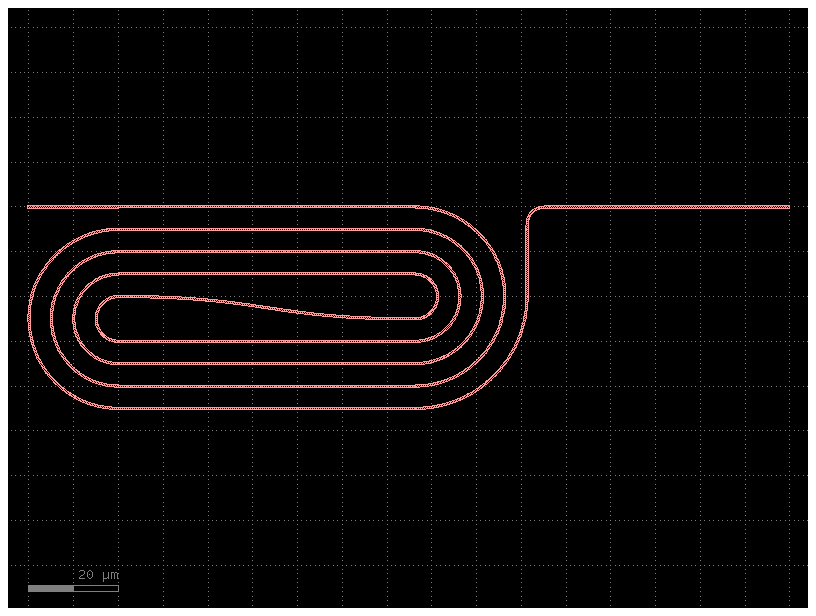

In [25]:
c = gf.components.spiral_racetrack_fixed_length()
c.plot()

## Useful contact pads / connectors

These functions are common shapes with ports, often used to make contact pads

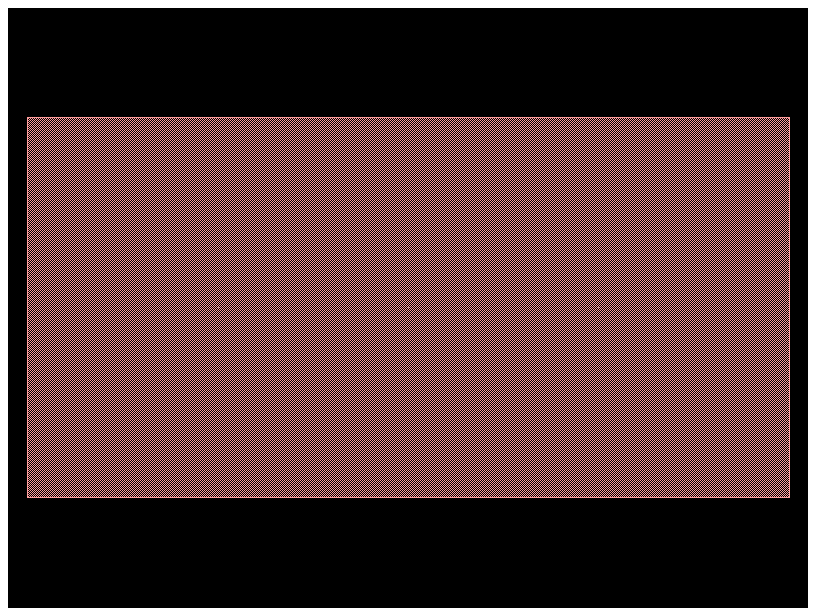

In [26]:
c = gf.components.compass(size=(4, 2), layer=(1, 0))
c.plot()

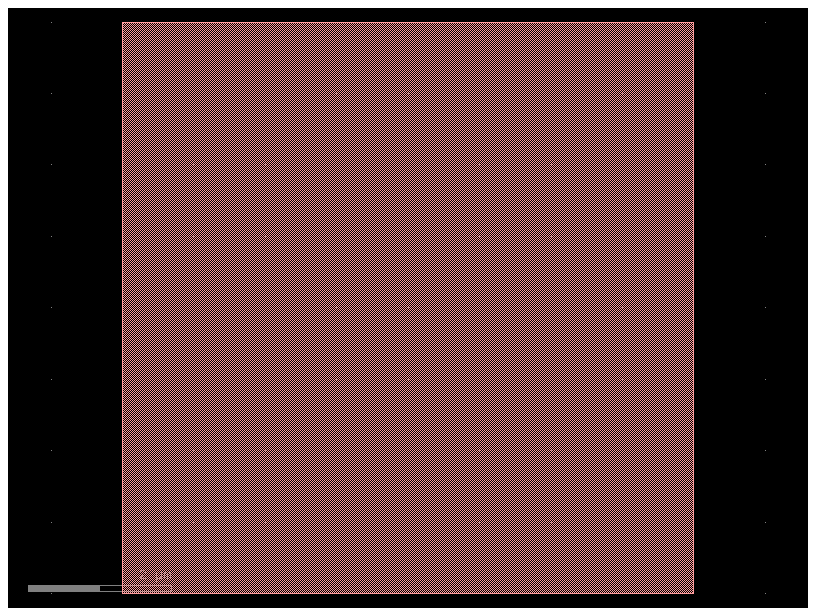

In [27]:
c = gf.components.nxn(north=3, south=4, east=0, west=0)
c.plot()

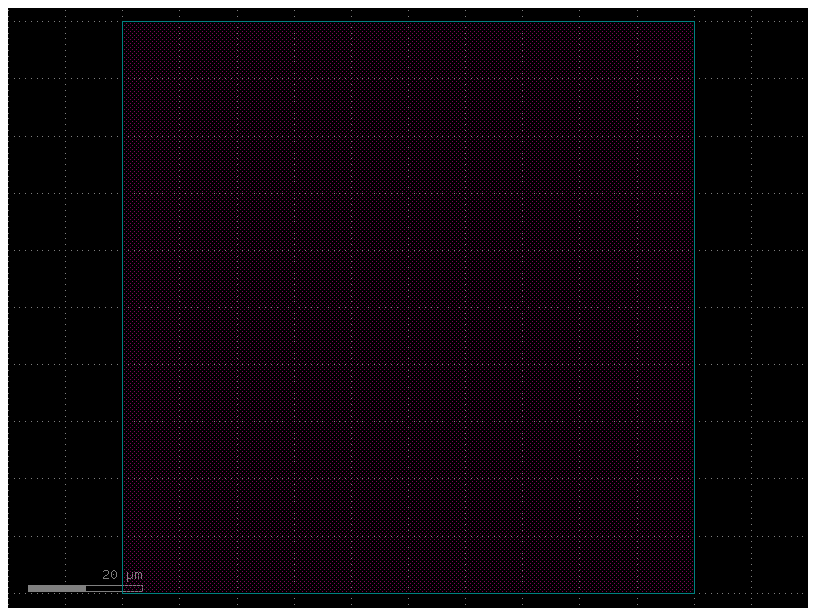

In [28]:
c = gf.components.pad()
c.plot()

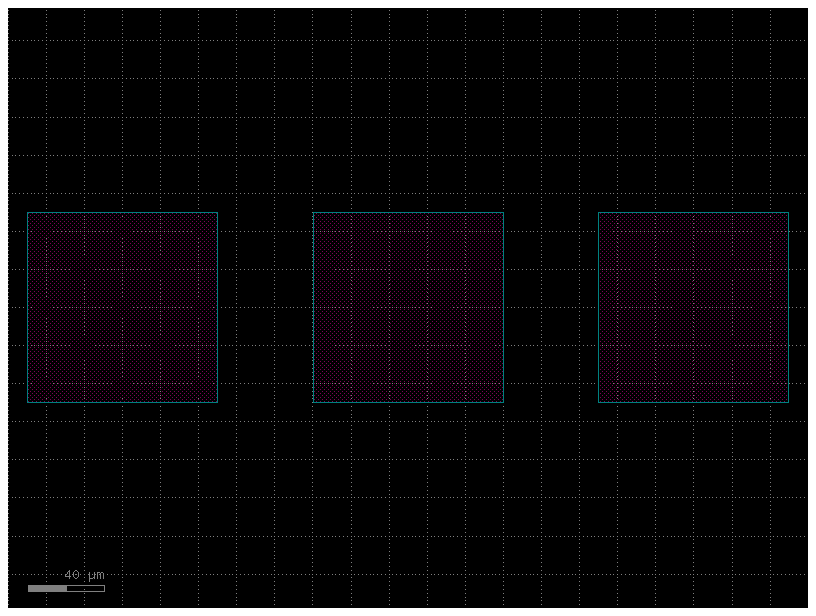

In [29]:
c = gf.components.pad_array90(columns=3)
c.plot()

## Chip / die template

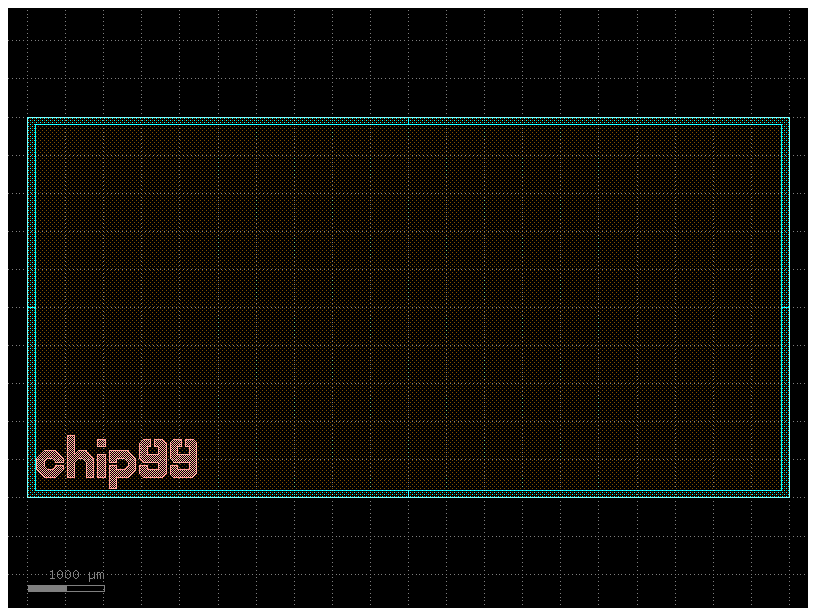

In [30]:
import gdsfactory as gf

c = gf.components.die(
    size=(10000, 5000),  # Size of die
    street_width=100,  # Width of corner marks for die-sawing
    street_length=1000,  # Length of corner marks for die-sawing
    die_name="chip99",  # Label text
    text_size=500,  # Label text size
    text_location="SW",  # Label text compass location e.g. 'S', 'SE', 'SW'
    layer=(2, 0),
    bbox_layer=(3, 0),
)
c.plot()

## Optimal superconducting curves

The following structures are meant to reduce "current crowding" in superconducting thin-film structures (such as superconducting nanowires).
They are the result of conformal mapping equations derived in  Clem, J. & Berggren, K. "[Geometry-dependent critical currents in superconducting nanocircuits." Phys. Rev. B 84, 1–27 (2011).](http://dx.doi.org/10.1103/PhysRevB.84.174510)

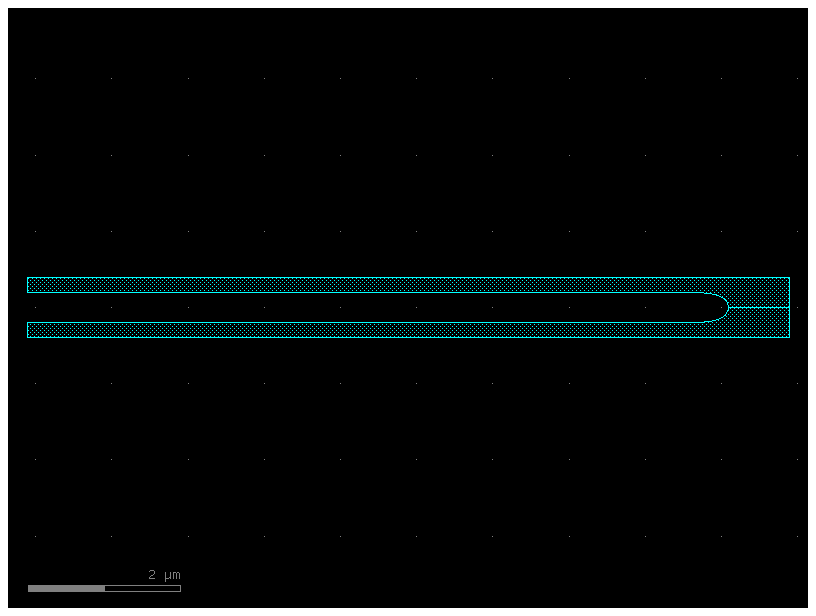

In [31]:
import gdsfactory as gf

c = gf.components.optimal_hairpin(
    width=0.2, pitch=0.6, length=10, turn_ratio=4, num_pts=50, layer=(2, 0)
)
c.plot()

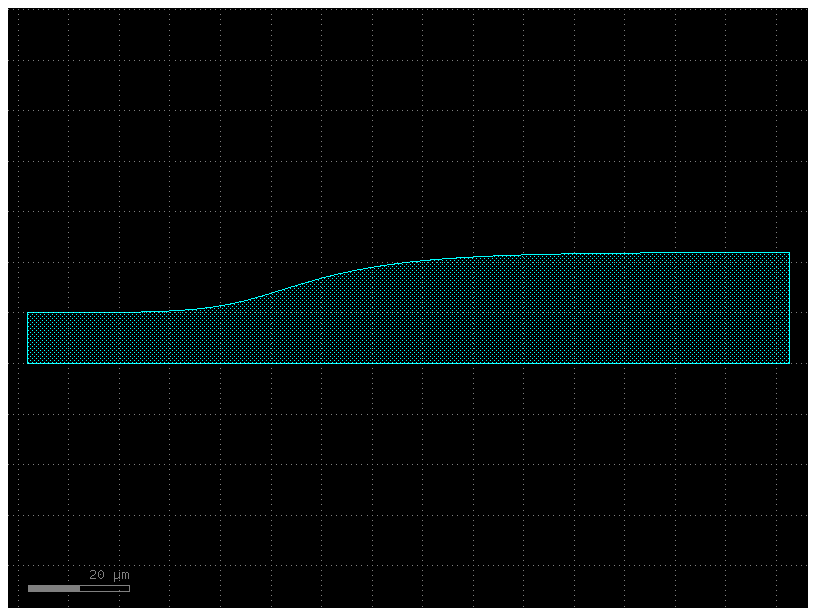

In [32]:
c = gf.components.optimal_step(
    start_width=10,
    end_width=22,
    num_pts=50,
    width_tol=1e-3,
    anticrowding_factor=1.2,
    symmetric=False,
    layer=(2, 0),
)
c.plot()

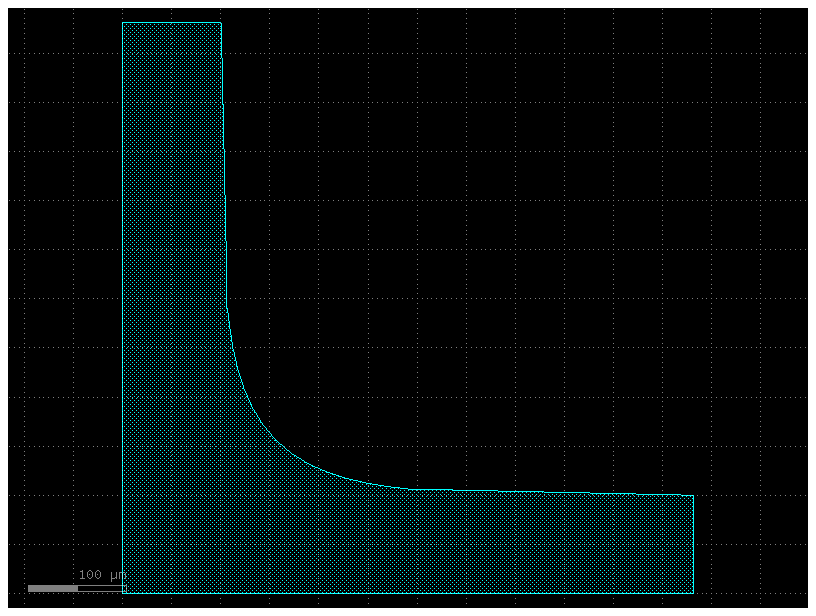

In [33]:
c = gf.components.optimal_90deg(width=100.0, num_pts=15, length_adjust=1, layer=(2, 0))
c.plot()

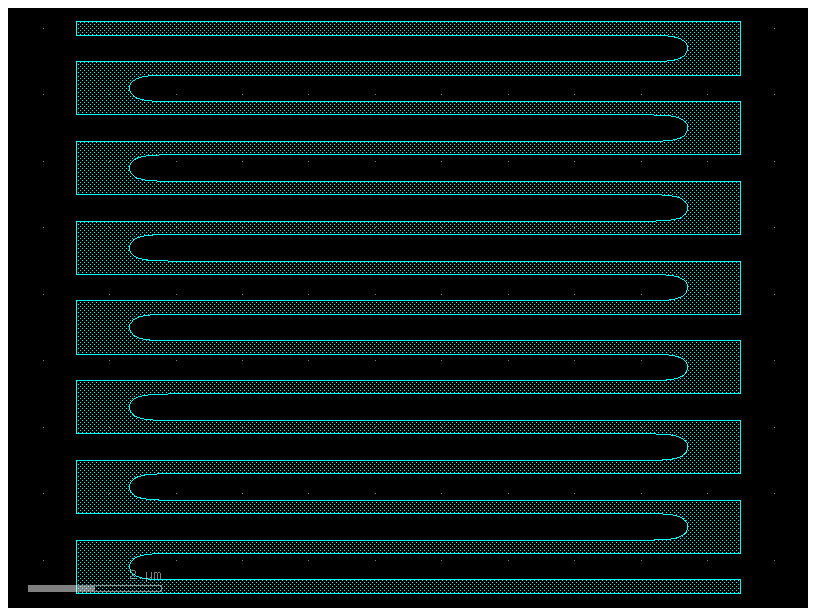

In [34]:
c = gf.components.snspd(
    wire_width=0.2,
    wire_pitch=0.6,
    size=(10, 8),
    num_squares=None,
    turn_ratio=4,
    terminals_same_side=False,
    layer=(2, 0),
)
c.plot()

## Generic library

gdsfactory comes with a [generic library](https://gdsfactory.github.io/gdsfactory/components.html) that you can customize it to your needs or even modify the internal code to create the Components that you need.